Usando K-nn entrenamos dos clasificadores independientes: 1 para maiz vs resto y otro para soja vs resto. Se usa 10-fold cross validation para dar confianza a los resultados (accuracy)

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns

In [19]:
df = pd.read_csv('results/dataset_mean_var.csv')

In [20]:
bandas_to_drop = ['band_'+str(i)+'_mean' for i in range(66)] + ['band_'+str(i)+'_var' for i in range(66)] 

In [21]:
df.drop(columns=bandas_to_drop, inplace=True)
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [22]:
df.cultivo.value_counts()

MAIZ          246
SOJA          168
GIRASOL        32
CAMPONATUR     18
ALFALFA         2
Name: cultivo, dtype: int64

In [23]:
df

,cultivo,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,...,band_56,band_57,band_58,band_59,band_60,band_61,band_62,band_63,band_64,band_65
0,MAIZ,0.294909,0.891577,1.836513,0.228713,-0.871737,0.207711,0.213346,0.647454,0.399040,...,0.897865,1.882518,0.155672,-1.709989,0.126186,0.130338,0.653081,0.425929,0.459842,0.254514
1,SOJA,0.354500,0.924392,2.098372,0.248241,-1.050501,0.218901,0.227279,0.677250,0.547650,...,0.900739,1.904153,0.164812,-1.628484,0.134796,0.139384,0.655666,0.438454,0.510339,0.264981
2,MAIZ,0.265749,0.875071,1.723864,0.195119,-0.992671,0.173785,0.178379,0.632874,0.331662,...,0.971879,2.600671,0.117817,-2.904561,0.086983,0.089539,0.722274,0.806963,0.416432,0.623472
3,MAIZ,0.329759,0.910911,1.984000,0.243527,-0.953812,0.218026,0.225289,0.664879,0.484036,...,0.901640,1.911017,0.101192,-2.570306,0.076131,0.078012,0.656477,0.442412,0.260500,0.268313
4,MAIZ,0.326524,0.909134,1.969667,0.233421,-1.020433,0.206807,0.213882,0.663262,0.475927,...,0.891177,1.833652,0.100895,-2.466148,0.076450,0.078313,0.647099,0.397356,0.239041,0.231089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,SOJA,0.320158,0.905626,1.941860,0.247406,-0.867436,0.224708,0.231434,0.660079,0.460104,...,0.942516,2.269772,0.248538,-1.220251,0.213973,0.223493,0.694168,0.639582,1.128600,0.449049
462,SOJA,0.330309,0.911213,1.986453,0.243959,-0.953364,0.218427,0.225716,0.665155,0.485421,...,0.899488,1.894685,0.170689,-1.544769,0.140932,0.145754,0.654539,0.432982,0.535340,0.260393
463,SOJA,0.308651,0.899250,1.892896,0.239855,-0.861503,0.218132,0.224330,0.654326,0.431946,...,0.919030,2.051645,0.229376,-1.157066,0.199143,0.206764,0.672308,0.521891,0.946682,0.337742
464,SOJA,0.334020,0.913247,2.003094,0.246778,-0.951130,0.221018,0.228484,0.667010,0.494790,...,0.975951,2.652838,0.226813,-1.699304,0.184730,0.194024,0.726240,0.832270,1.003968,0.651349


# Clasificamos maiz vs resto del mundo

In [32]:
df_maiz = df.copy()
df_maiz.loc[df_maiz.cultivo=='MAIZ', 'cultivo'] = 1
df_maiz.loc[df_maiz.cultivo!=1, 'cultivo'] = 0
df_maiz.cultivo = df_maiz.cultivo.astype(int)
df_maiz.rename(columns={'cultivo': 'maiz'}, inplace=True)

In [33]:
df_maiz

,maiz,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,...,band_56,band_57,band_58,band_59,band_60,band_61,band_62,band_63,band_64,band_65
0,1,0.294909,0.891577,1.836513,0.228713,-0.871737,0.207711,0.213346,0.647454,0.399040,...,0.897865,1.882518,0.155672,-1.709989,0.126186,0.130338,0.653081,0.425929,0.459842,0.254514
1,0,0.354500,0.924392,2.098372,0.248241,-1.050501,0.218901,0.227279,0.677250,0.547650,...,0.900739,1.904153,0.164812,-1.628484,0.134796,0.139384,0.655666,0.438454,0.510339,0.264981
2,1,0.265749,0.875071,1.723864,0.195119,-0.992671,0.173785,0.178379,0.632874,0.331662,...,0.971879,2.600671,0.117817,-2.904561,0.086983,0.089539,0.722274,0.806963,0.416432,0.623472
3,1,0.329759,0.910911,1.984000,0.243527,-0.953812,0.218026,0.225289,0.664879,0.484036,...,0.901640,1.911017,0.101192,-2.570306,0.076131,0.078012,0.656477,0.442412,0.260500,0.268313
4,1,0.326524,0.909134,1.969667,0.233421,-1.020433,0.206807,0.213882,0.663262,0.475927,...,0.891177,1.833652,0.100895,-2.466148,0.076450,0.078313,0.647099,0.397356,0.239041,0.231089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,0,0.320158,0.905626,1.941860,0.247406,-0.867436,0.224708,0.231434,0.660079,0.460104,...,0.942516,2.269772,0.248538,-1.220251,0.213973,0.223493,0.694168,0.639582,1.128600,0.449049
462,0,0.330309,0.911213,1.986453,0.243959,-0.953364,0.218427,0.225716,0.665155,0.485421,...,0.899488,1.894685,0.170689,-1.544769,0.140932,0.145754,0.654539,0.432982,0.535340,0.260393
463,0,0.308651,0.899250,1.892896,0.239855,-0.861503,0.218132,0.224330,0.654326,0.431946,...,0.919030,2.051645,0.229376,-1.157066,0.199143,0.206764,0.672308,0.521891,0.946682,0.337742
464,0,0.334020,0.913247,2.003094,0.246778,-0.951130,0.221018,0.228484,0.667010,0.494790,...,0.975951,2.652838,0.226813,-1.699304,0.184730,0.194024,0.726240,0.832270,1.003968,0.651349


In [210]:
#buscamos el mejor k en este rango
k_neighb = list(range(1,50))


folds = 5

X = np.array(df_maiz.iloc[:, 1:])
y = np.array(df_maiz.iloc[:,0])

accuracy_maiz = []

for k in k_neighb:
    
    accu = []

    skf = StratifiedKFold(n_splits=folds, shuffle=True)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]

        neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        y_pred = neigh.predict(X_test)
        accu.append(accuracy_score(y_test, y_pred))
    
    accuracy_maiz.append(np.mean(accu))

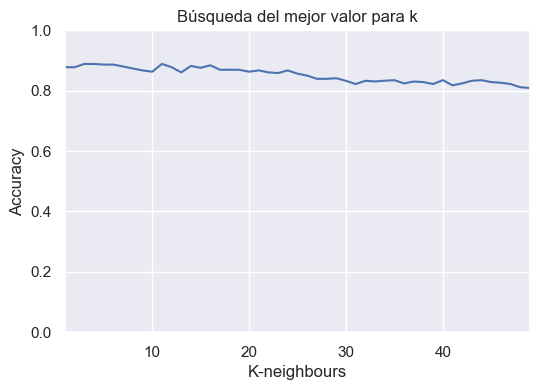

In [211]:
sns.set_theme()
plt.figure(dpi=100)
plt.plot(k_neighb, accuracy_maiz)
plt.ylim(0,1)
plt.xlim(1,np.max(k_neighb))
plt.xlabel('K-neighbours')
plt.ylabel('Accuracy')
plt.title('Búsqueda del mejor valor para k')
plt.show()

In [214]:
folds = 10
n_neighb = 3 #lo seteamos al max robusto (con vecinos tambien con buena performance)

X = np.array(df_maiz.iloc[:, 1:])
y = np.array(df_maiz.iloc[:,0])

accuracy_maiz = []

skf = StratifiedKFold(n_splits=folds, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighb).fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy_maiz.append(accuracy_score(y_test, y_pred))
    

In [215]:
np.mean(accuracy_maiz)

0.8991211840888067

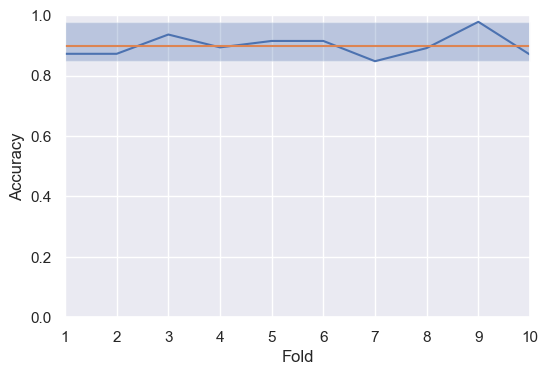

In [216]:
sns.set_theme()
plt.figure(dpi=100)
plt.plot(list(range(1,folds+1)), accuracy_maiz)
plt.plot(list(range(1,folds+1)), np.repeat(np.mean(accuracy_maiz), folds))
plt.fill_between(list(range(1,folds+1)), np.min(accuracy_maiz), np.max(accuracy_maiz), alpha=.3)
plt.ylim(0,1)
plt.xlim(1,folds)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# Clasificamos soja vs resto del mundo

In [133]:
df_soja = df.copy()
df_soja.loc[df_soja.cultivo=='SOJA', 'cultivo'] = 1
df_soja.loc[df_soja.cultivo!=1, 'cultivo'] = 0
df_soja.cultivo = df_soja.cultivo.astype(int)
df_soja.rename(columns={'cultivo': 'soja'}, inplace=True)

In [134]:
df_soja

,soja,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,...,band_56,band_57,band_58,band_59,band_60,band_61,band_62,band_63,band_64,band_65
0,0,0.294909,0.891577,1.836513,0.228713,-0.871737,0.207711,0.213346,0.647454,0.399040,...,0.897865,1.882518,0.155672,-1.709989,0.126186,0.130338,0.653081,0.425929,0.459842,0.254514
1,1,0.354500,0.924392,2.098372,0.248241,-1.050501,0.218901,0.227279,0.677250,0.547650,...,0.900739,1.904153,0.164812,-1.628484,0.134796,0.139384,0.655666,0.438454,0.510339,0.264981
2,0,0.265749,0.875071,1.723864,0.195119,-0.992671,0.173785,0.178379,0.632874,0.331662,...,0.971879,2.600671,0.117817,-2.904561,0.086983,0.089539,0.722274,0.806963,0.416432,0.623472
3,0,0.329759,0.910911,1.984000,0.243527,-0.953812,0.218026,0.225289,0.664879,0.484036,...,0.901640,1.911017,0.101192,-2.570306,0.076131,0.078012,0.656477,0.442412,0.260500,0.268313
4,0,0.326524,0.909134,1.969667,0.233421,-1.020433,0.206807,0.213882,0.663262,0.475927,...,0.891177,1.833652,0.100895,-2.466148,0.076450,0.078313,0.647099,0.397356,0.239041,0.231089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,1,0.320158,0.905626,1.941860,0.247406,-0.867436,0.224708,0.231434,0.660079,0.460104,...,0.942516,2.269772,0.248538,-1.220251,0.213973,0.223493,0.694168,0.639582,1.128600,0.449049
462,1,0.330309,0.911213,1.986453,0.243959,-0.953364,0.218427,0.225716,0.665155,0.485421,...,0.899488,1.894685,0.170689,-1.544769,0.140932,0.145754,0.654539,0.432982,0.535340,0.260393
463,1,0.308651,0.899250,1.892896,0.239855,-0.861503,0.218132,0.224330,0.654326,0.431946,...,0.919030,2.051645,0.229376,-1.157066,0.199143,0.206764,0.672308,0.521891,0.946682,0.337742
464,1,0.334020,0.913247,2.003094,0.246778,-0.951130,0.221018,0.228484,0.667010,0.494790,...,0.975951,2.652838,0.226813,-1.699304,0.184730,0.194024,0.726240,0.832270,1.003968,0.651349


In [217]:


#buscamos el mejor k en este rango
k_neighb = list(range(1,50))


folds = 5

X = np.array(df_soja.iloc[:, 1:])
y = np.array(df_soja.iloc[:,0])

accuracy_soja = []

for k in k_neighb:
    
    accu = []

    skf = StratifiedKFold(n_splits=folds, shuffle=True)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]

        neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        y_pred = neigh.predict(X_test)
        accu.append(accuracy_score(y_test, y_pred))
    
    accuracy_soja.append(np.mean(accu))
    

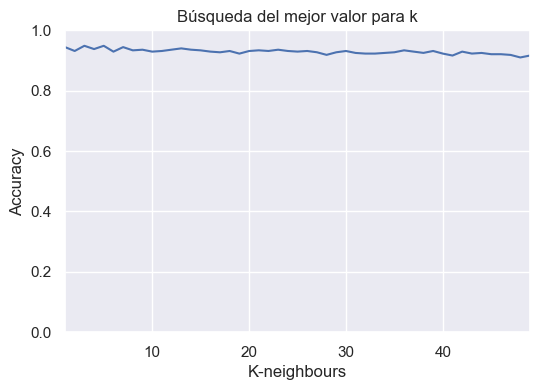

In [218]:
sns.set_theme()
plt.figure(dpi=100)
plt.plot(k_neighb, accuracy_soja)
plt.ylim(0,1)
plt.xlim(1,np.max(k_neighb))
plt.xlabel('K-neighbours')
plt.ylabel('Accuracy')
plt.title('Búsqueda del mejor valor para k')
plt.show()

In [220]:
folds = 10
n_neighb = 3 #lo seteamos al max robusto (con vecinos tambien con buena performance)

X = np.array(df_soja.iloc[:, 1:])
y = np.array(df_soja.iloc[:,0])

accuracy_soja = []

skf = StratifiedKFold(n_splits=folds, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighb).fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy_soja.append(accuracy_score(y_test, y_pred))

In [221]:
np.mean(accuracy_soja)

0.9441720629047181

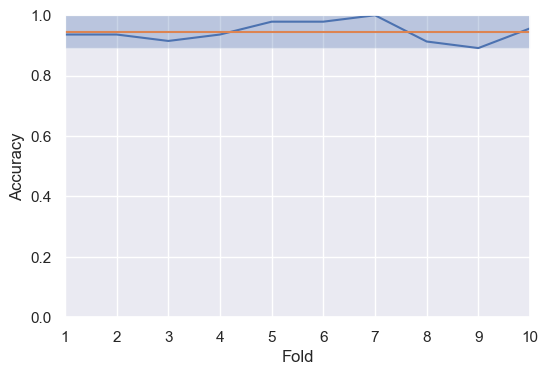

In [222]:
sns.set_theme()
plt.figure(dpi=100)
plt.plot(list(range(1,folds+1)), accuracy_soja)
plt.plot(list(range(1,folds+1)), np.repeat(np.mean(accuracy_soja), folds))
plt.fill_between(list(range(1,folds+1)), np.min(accuracy_soja), np.max(accuracy_soja), alpha=.3)
plt.ylim(0,1)
plt.xlim(1,folds)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()